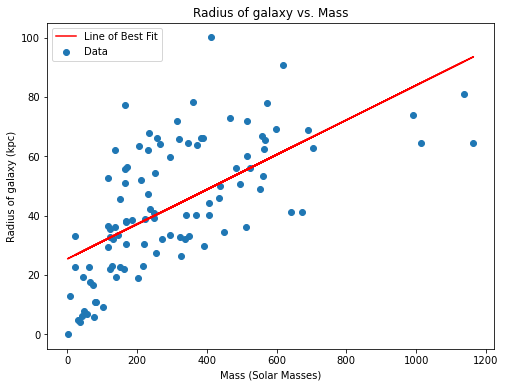

Equation of the line of best fit: Radius = 0.06 * Mass + 25.38
Uncertainty of the slope: 0.01
Uncertainty of the intercept: 2.73


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the data from the CSV file
df = pd.read_csv('/Users/anikamondal/Desktop/combined_data_distant.csv')

# Calculate radial velocity dispersion for each unique radius
dispersions = []
for radius in df['Radius'].unique():
    velocities_at_radius = df[df['Radius'] == radius]['RadialVelocity']
    dispersion = np.std(velocities_at_radius)
    dispersions.append(dispersion)

# Convert list to array
dispersions = np.array(dispersions)

# Constants
G = 4.302e-3  # Gravitational constant in pc * (km/s)^2 / Msun
k = 2  # Assumed constant for mass distribution profile

# Calculate the mass using the virial theorem
mass = 3 * (dispersions**2) * df['Radius'].unique() / (G * k)  # in solar masses

# Perform linear regression to get the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(mass, df['Radius'].unique())

# Plot mass vs. radius
plt.figure(figsize=(8, 6))
plt.scatter(mass, df['Radius'].unique(), marker='o', label='Data')
plt.plot(mass, slope * mass + intercept, color='red', label='Line of Best Fit')
plt.xlabel('Mass (Solar Masses)')
plt.ylabel('Radius of galaxy (kpc)')
plt.title('Radius of galaxy vs. Mass')
plt.legend()
plt.show()

# Print the equation of the line of best fit
print(f"Equation of the line of best fit: Radius = {slope:.2f} * Mass + {intercept:.2f}")

# Calculate the sum of squares of the residuals
SSR = np.sum((df['Radius'].unique() - (slope * mass + intercept))**2)

# Calculate the variance of the residuals
VAR = SSR / (len(df['Radius'].unique()) - 2)

# Calculate the standard error of the slope
mean_x = np.mean(mass)
SE_slope = np.sqrt(VAR / np.sum((mass - mean_x)**2))

# Print the uncertainty of the slope
print(f"Uncertainty of the slope: {SE_slope:.2f}")


# Calculate the sum of squares of the residuals
SSR = np.sum((df['Radius'].unique() - (slope * mass + intercept))**2)

# Calculate the variance of the residuals
VAR = SSR / (len(df['Radius'].unique()) - 2)

# Calculate the standard error of the intercept
mean_x = np.mean(mass)
SE_intercept = np.sqrt(VAR / len(df['Radius'].unique()) + (mean_x**2 * VAR) / np.sum((mass - mean_x)**2))

# Print the uncertainty of the intercept
print(f"Uncertainty of the intercept: {SE_intercept:.2f}")